images in dataset:  2820
Found 2820 files belonging to 2 classes.
Using 2538 files for training.
Found 2820 files belonging to 2 classes.
Using 282 files for validation.
['not', 'target']
(48, 28, 28, 3)
(48,)
Epoch 1/12
53/53 [==============================] - 8s 129ms/step - loss: 6.1733 - binary_accuracy: 0.7403 - val_loss: 0.4045 - val_binary_accuracy: 0.8546
Epoch 2/12
53/53 [==============================] - 6s 110ms/step - loss: 0.3487 - binary_accuracy: 0.8574 - val_loss: 0.3130 - val_binary_accuracy: 0.8688
Epoch 3/12
53/53 [==============================] - 6s 107ms/step - loss: 0.3147 - binary_accuracy: 0.8688 - val_loss: 0.2838 - val_binary_accuracy: 0.8652
Epoch 4/12
53/53 [==============================] - 6s 113ms/step - loss: 0.2805 - binary_accuracy: 0.8830 - val_loss: 0.2705 - val_binary_accuracy: 0.8652
Epoch 5/12
53/53 [==============================] - 7s 132ms/step - loss: 0.2519 - binary_accuracy: 0.9023 - val_loss: 0.2503 - val_binary_accuracy: 0.8830
Epoch 6/12

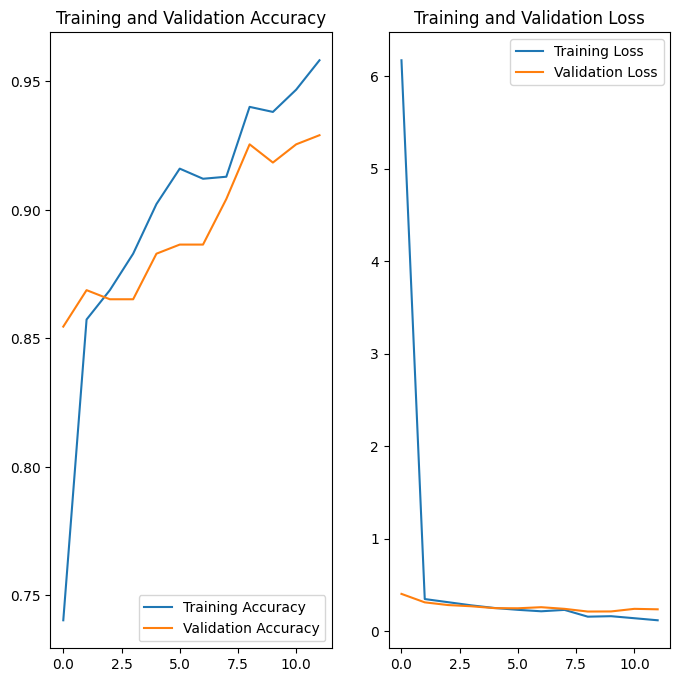

In [7]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt


data_dir = pathlib.Path('./OW2dataset')

image_count = len(list(data_dir.glob('*/*.png')))


print("images in dataset: ", image_count)

batch_size = 48
img_height = 28
img_width = 28

# sample = list(data_dir.glob('class1/*'))
# im = PIL.Image.open(str(sample[0]))
# im.show()

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = tf.keras.Sequential([
  #tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Normalization(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['binary_accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
  patience=5,
  min_delta=0.001,
  restore_best_weights=True,
)

epochs = 12
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  #callbacks = [early_stopping],
)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
# save model
model.save('./models/OW2d.keras')

In [10]:
img = tf.keras.utils.load_img('./OW2dataset/not/2.png', target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
# score = tf.nn.sigmoid(predictions[0])

print(predictions, class_names[1])


1/1 [==============================] - 0s 27ms/step
[[0.07044983]] target


In [212]:
# predict pictures in test
dir = pathlib.Path('./test/')
arr= list(dir.glob('*.jpg'))

for x in range(len(arr)):
    print (arr[x])
    im = tf.keras.utils.load_img(arr[x], target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(im)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    print(predictions, class_names[1])


test\1706064832.165285.jpg
1/1 [==============================] - 0s 34ms/step
[[0.62295824]] target
test\1706064833.7282841.jpg
1/1 [==============================] - 0s 29ms/step
[[0.01475323]] target
test\1706064834.5132797.jpg
1/1 [==============================] - 0s 30ms/step
[[0.0120629]] target
test\1706064835.2592797.jpg
1/1 [==============================] - 0s 23ms/step
[[4.1966934e-05]] target
test\1706064836.8642898.jpg
1/1 [==============================] - 0s 26ms/step
[[0.09030465]] target
test\1706064887.500459.jpg
1/1 [==============================] - 0s 34ms/step
[[0.96074444]] target
test\1706064887.8704617.jpg
1/1 [==============================] - 0s 34ms/step
[[0.00013391]] target
test\1706064888.9004605.jpg
1/1 [==============================] - 0s 41ms/step
[[0.02406905]] target
